In [54]:
import pandas as pd
import numpy as np

## Load Data

In [55]:
crop = pd.read_csv("Crop_recommendation.csv")

In [56]:
crop = crop.drop('rainfall', axis=1)

## Exploratory Data Anlalysis (EDA)

In [57]:
crop.head()

,N,P,K,temperature,humidity,ph,label
0,90,42,43,20.879744,82.002744,6.502985,rice
1,85,58,41,21.770462,80.319644,7.038096,rice
2,60,55,44,23.004459,82.320763,7.840207,rice
3,74,35,40,26.491096,80.158363,6.980401,rice
4,78,42,42,20.130175,81.604873,7.628473,rice


In [58]:
crop.shape

(2200, 7)

In [59]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   label        2200 non-null   object 
dtypes: float64(3), int64(3), object(1)
memory usage: 120.4+ KB


In [60]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
label          0
dtype: int64

In [61]:
crop.duplicated().sum()

0

In [62]:
crop.describe()

,N,P,K,temperature,humidity,ph
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091


## Correlation Analysis

In [63]:
numeric_crop = crop.select_dtypes(include=['number'])
numeric_crop.corr()

,N,P,K,temperature,humidity,ph
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:>

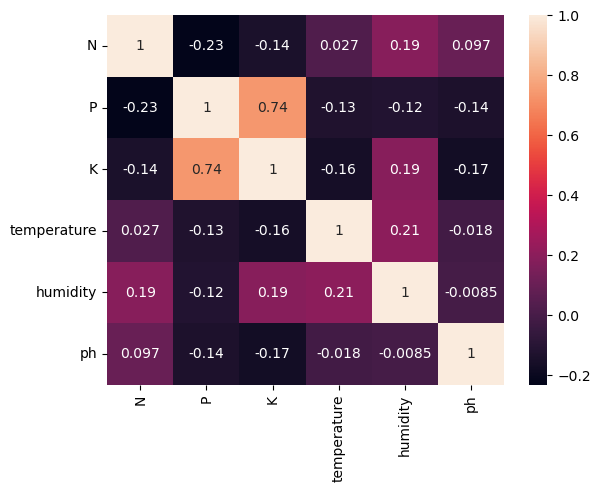

In [11]:
import seaborn as sns
numeric_crop = crop.select_dtypes(include=['number'])
sns.heatmap(numeric_crop.corr(), annot=True, cbar=True)

In [64]:
crop.label.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [13]:
crop['label'].unique().size

22

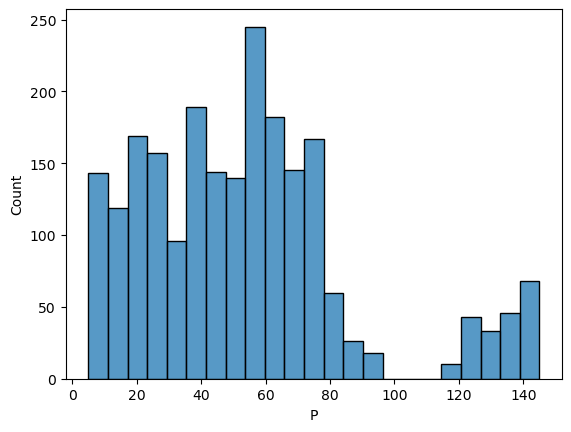

In [65]:
import matplotlib.pyplot as plt
sns.histplot(crop['P'])
plt.show()

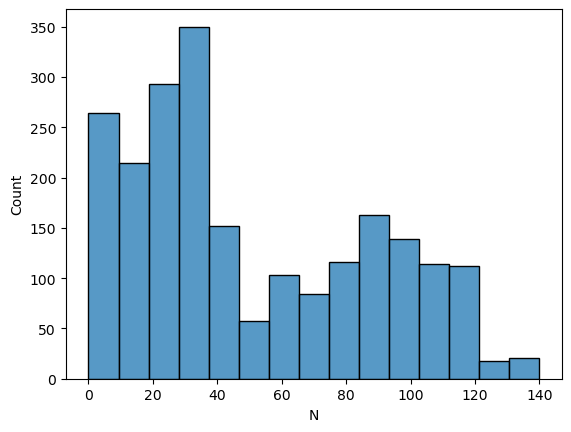

In [15]:
import matplotlib.pyplot as plt
sns.histplot(crop['N'])
plt.show()

## Distribution plots for numerical features

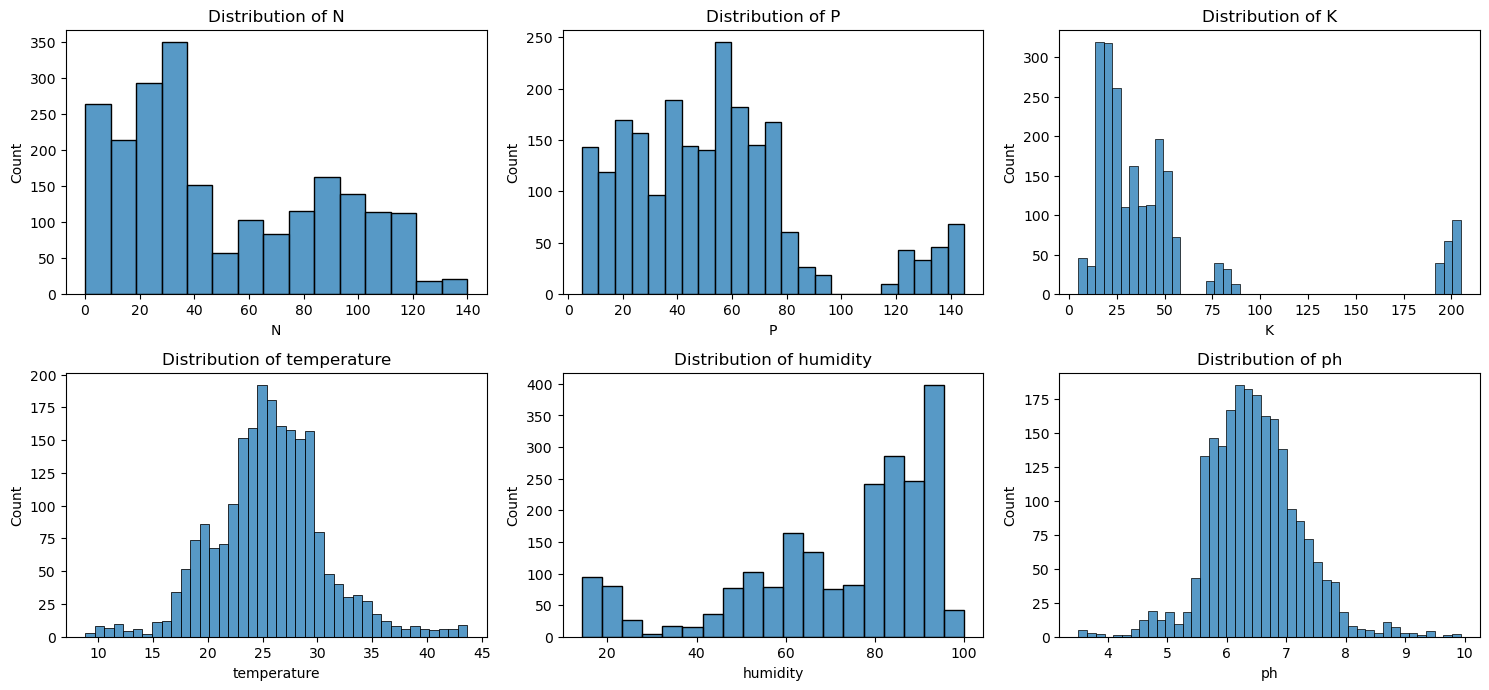

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(crop.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=crop, x=col)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()



## Box plots to check for outliers

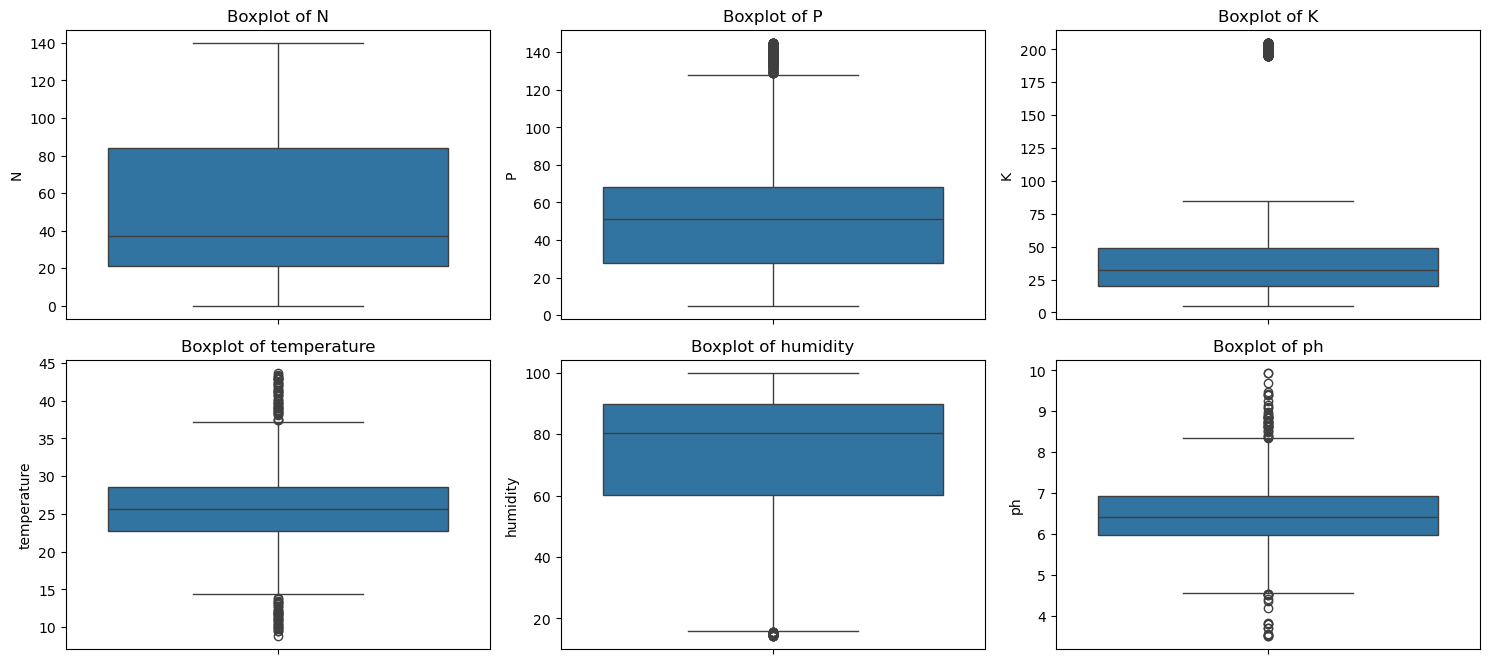

In [68]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(crop.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=crop, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

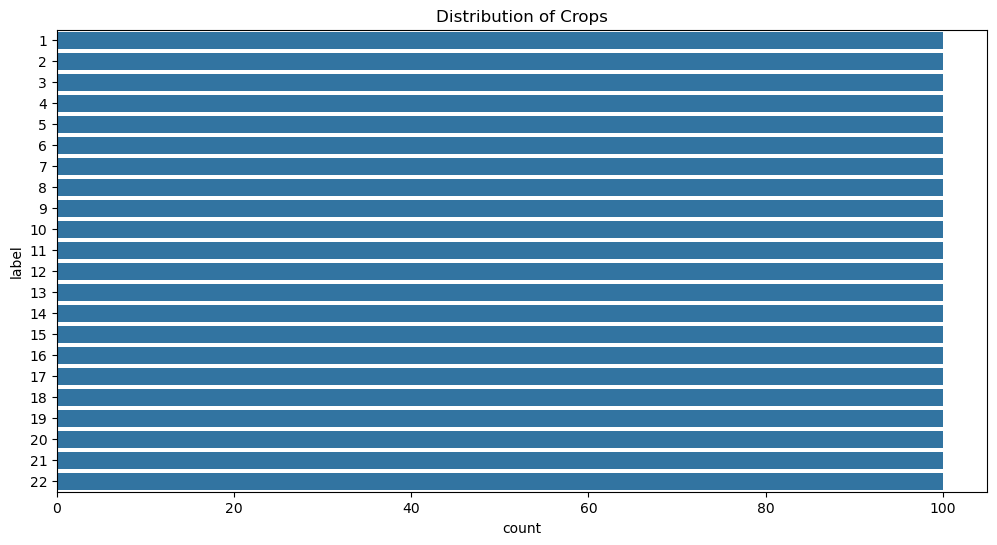

In [41]:
plt.figure(figsize=(12, 6))
sns.countplot(data=crop, y='label')
plt.title('Distribution of Crops')
plt.show()


## Box plots for each feature by crop

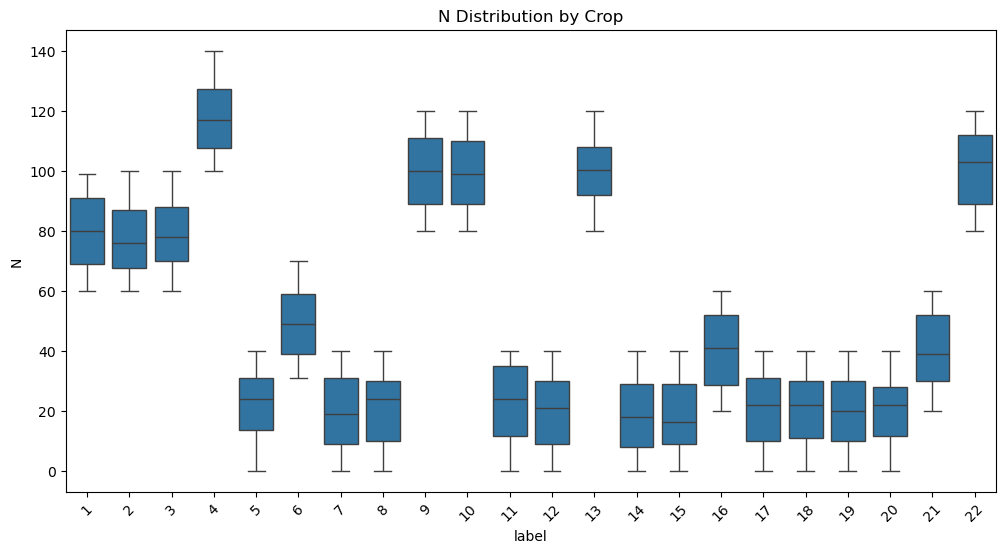

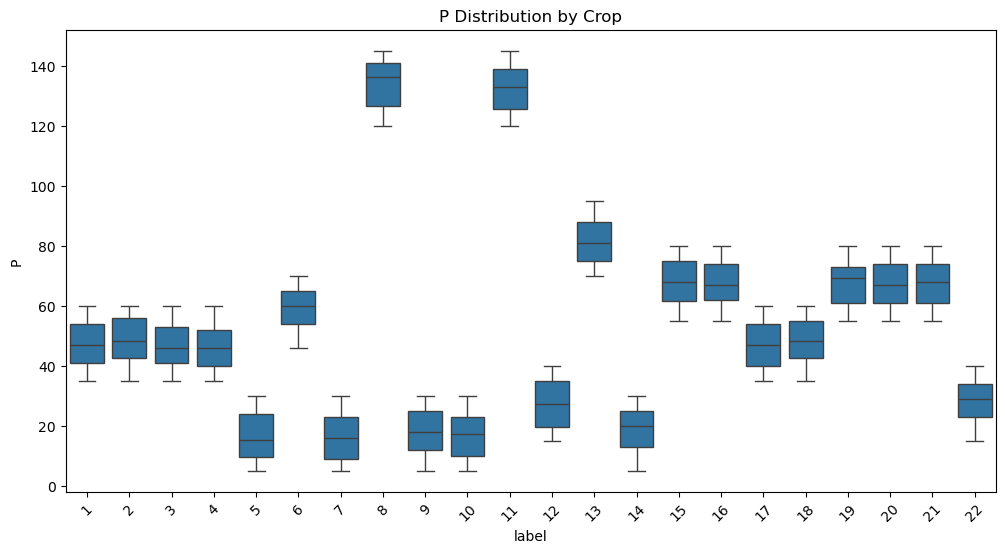

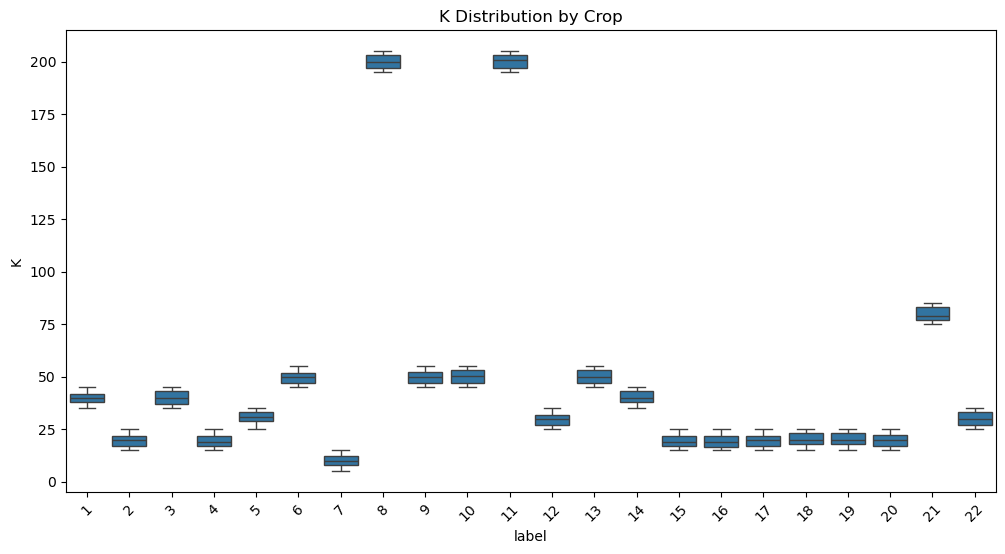

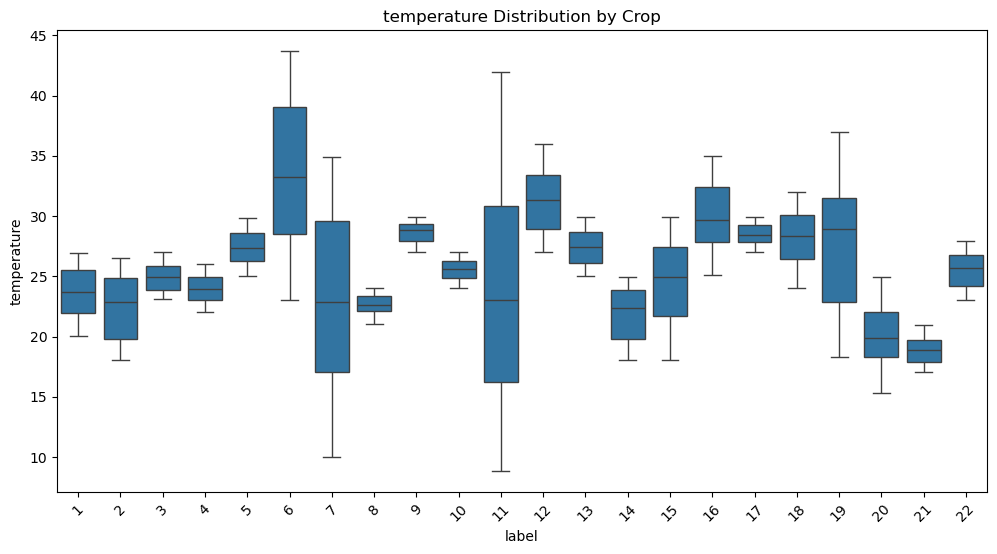

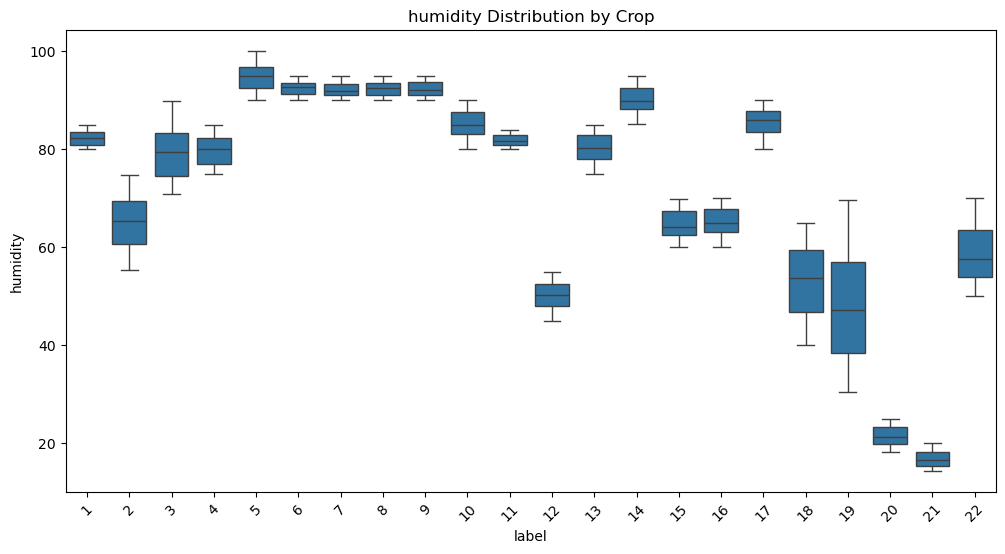

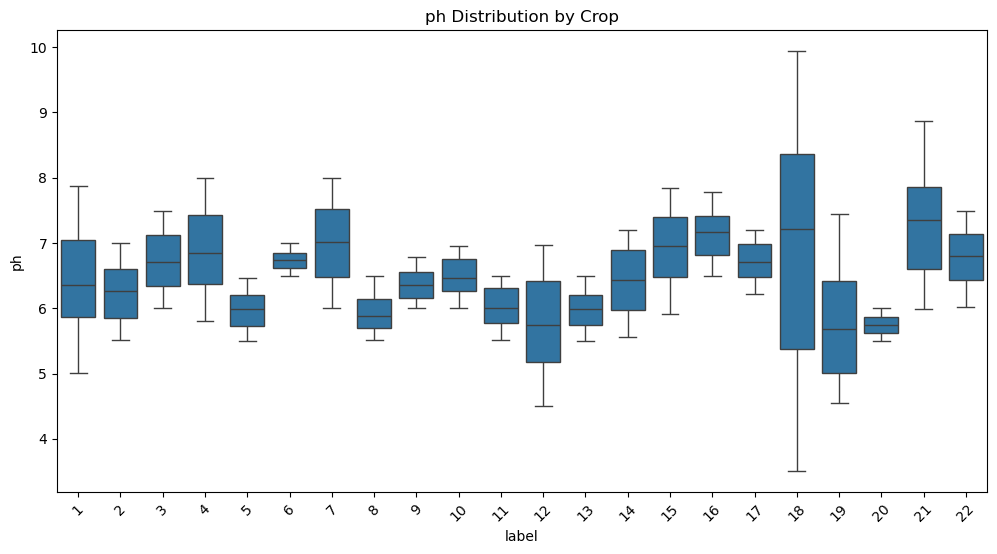

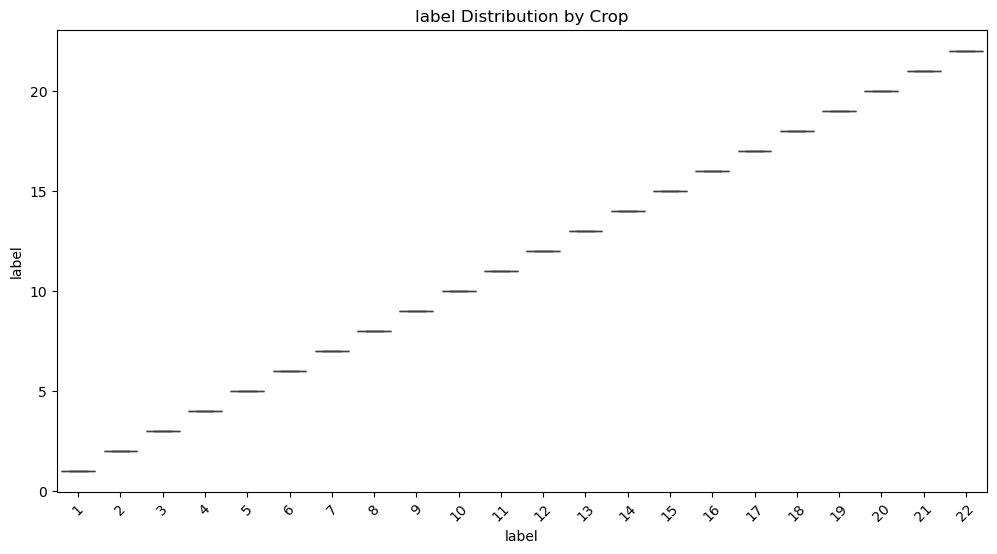

In [42]:
features = crop.select_dtypes(include=['float64', 'int64']).columns
for feature in features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=crop, x='label', y=feature)
    plt.xticks(rotation=45)
    plt.title(f'{feature} Distribution by Crop')
    plt.show()


In [16]:
crop.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

## Map String to Numerical Values

In [17]:
crop_dict={
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}

crop['label'] = crop['label'].map(crop_dict)

In [18]:
crop.head()

,N,P,K,temperature,humidity,ph,label
0,90,42,43,20.879744,82.002744,6.502985,1
1,85,58,41,21.770462,80.319644,7.038096,1
2,60,55,44,23.004459,82.320763,7.840207,1
3,74,35,40,26.491096,80.158363,6.980401,1
4,78,42,42,20.130175,81.604873,7.628473,1


In [19]:
crop.label.unique()

array([ 1,  2, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,
        6,  5,  4,  3, 22])

In [20]:
crop.label.value_counts()

label
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

In [21]:
X=crop.drop('label', axis = 1)
y=crop['label']

In [22]:
X.head()

,N,P,K,temperature,humidity,ph
0,90,42,43,20.879744,82.002744,6.502985
1,85,58,41,21.770462,80.319644,7.038096
2,60,55,44,23.004459,82.320763,7.840207
3,74,35,40,26.491096,80.158363,6.980401
4,78,42,42,20.130175,81.604873,7.628473


In [23]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

## Data Splitting

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
X_train.shape

(1760, 6)

## Data Scaling

In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
mx = MinMaxScaler()
sc = StandardScaler()

X_train_mx = mx.fit_transform(X_train)
X_train_sc = sc.fit_transform(X_train_mx)

X_test_mx = mx.transform(X_test) 
X_test_sc = sc.transform(X_test_mx)


In [27]:
X_train_mx

array([[0.12142857, 0.07857143, 0.045     , 0.21723408, 0.9089898 ,
        0.48532225],
       [0.26428571, 0.52857143, 0.07      , 0.53710965, 0.64257946,
        0.56594073],
       [0.05      , 0.48571429, 0.1       , 0.53647858, 0.57005802,
        0.58835229],
       ...,
       [0.07857143, 0.22142857, 0.13      , 0.54792131, 0.43760347,
        0.46198144],
       [0.07857143, 0.85      , 0.995     , 0.1321158 , 0.76763665,
        0.44420505],
       [0.22857143, 0.52142857, 0.085     , 0.43458302, 0.56099735,
        0.54465022]])

## Model Building

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score


* Model Definition

In [29]:
models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB':GaussianNB(),
    'SVC':SVC(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'ExtraTreeClassifier':ExtraTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'BaggingClassifier':BaggingClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier()
}

* Model Training and Evaluation

In [30]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} model with accuracy: {score}")

/home/teddy/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression model with accuracy: 0.8909090909090909
GaussianNB model with accuracy: 0.9590909090909091
SVC model with accuracy: 0.875
KNeighborsClassifier model with accuracy: 0.8977272727272727
DecisionTreeClassifier model with accuracy: 0.9545454545454546
ExtraTreeClassifier model with accuracy: 0.8545454545454545
RandomForestClassifier model with accuracy: 0.975
BaggingClassifier model with accuracy: 0.9590909090909091
GradientBoostingClassifier model with accuracy: 0.9636363636363636
AdaBoostClassifier model with accuracy: 0.23636363636363636


* Choose the best model

In [31]:
randclf = RandomForestClassifier()
randclf.fit(X_train_sc, y_train)
y_pred = randclf.predict(X_test_sc)
accuracy_score(y_test, y_pred)

0.9772727272727273

## Model Evaluation

In [69]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

* Precision

In [70]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision for each crop class:")
for crop, prec in zip(np.unique(y_test), precision):
    print(f"{crop}: {prec:.4f}")

avg_precision = precision_score(y_test, y_pred, average='weighted')
print(f"\nWeighted Average Precision: {avg_precision:.4f}")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))


Precision for each crop class:
1: 0.9444
2: 1.0000
3: 0.9167
4: 1.0000
5: 1.0000
6: 1.0000
7: 1.0000
8: 1.0000
9: 1.0000
10: 1.0000
11: 1.0000
12: 1.0000
13: 1.0000
14: 1.0000
15: 0.7143
16: 0.9500
17: 1.0000
18: 1.0000
19: 0.9130
20: 1.0000
21: 1.0000
22: 1.0000

Weighted Average Precision: 0.9793

Detailed Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.89      0.92        19
           2       1.00      1.00      1.00        21
           3       0.92      0.96      0.94        23
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        19
          11       1.00      1.00      1.00        14
          12      

* Recall

In [49]:
recall = recall_score(y_test, y_pred, average=None)
print("Recall for each crop class:")
for crop, rec in zip(np.unique(y_test), recall):
    print(f"{crop}: {rec:.4f}")

avg_recall = recall_score(y_test, y_pred, average='weighted')
print(f"\nWeighted Average Recall: {avg_recall:.4f}")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

Recall for each crop class:
1: 0.8947
2: 1.0000
3: 0.9565
4: 1.0000
5: 1.0000
6: 1.0000
7: 1.0000
8: 1.0000
9: 1.0000
10: 1.0000
11: 1.0000
12: 1.0000
13: 1.0000
14: 1.0000
15: 0.9091
16: 0.9500
17: 1.0000
18: 0.8750
19: 0.9130
20: 1.0000
21: 1.0000
22: 1.0000

Weighted Average Recall: 0.9773

Detailed Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.89      0.92        19
           2       1.00      1.00      1.00        21
           3       0.92      0.96      0.94        23
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        19
          11       1.00      1.00      1.00        14
          12       1.00 

* F1-score

F1-Score for each crop class:
1: 0.9189
2: 1.0000
3: 0.9362
4: 1.0000
5: 1.0000
6: 1.0000
7: 1.0000
8: 1.0000
9: 1.0000
10: 1.0000
11: 1.0000
12: 1.0000
13: 1.0000
14: 1.0000
15: 0.8000
16: 0.9500
17: 1.0000
18: 0.9333
19: 0.9130
20: 1.0000
21: 1.0000
22: 1.0000

Weighted Average F1-Score: 0.9777


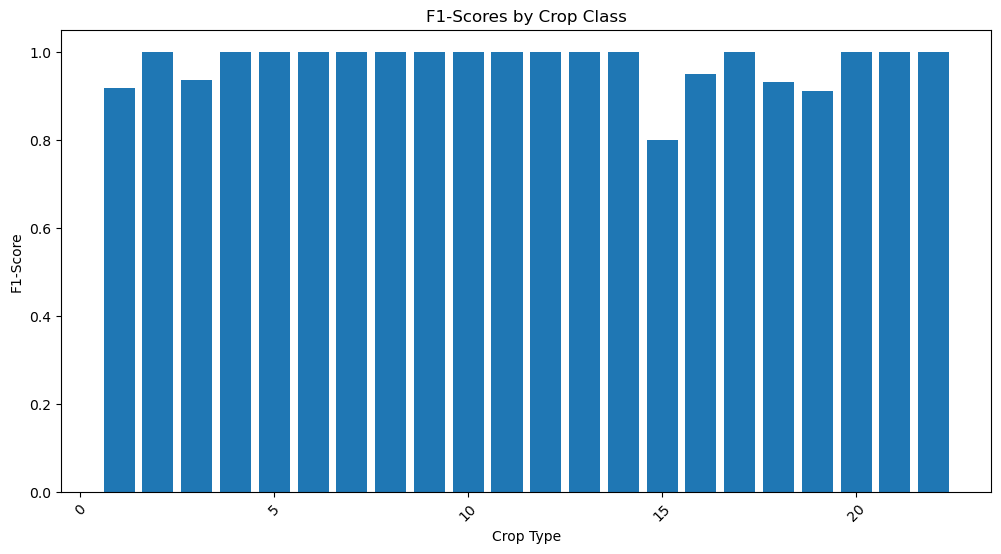

In [51]:
from sklearn.metrics import f1_score, classification_report

f1 = f1_score(y_test, y_pred, average=None)
print("F1-Score for each crop class:")
for crop, f1_val in zip(np.unique(y_test), f1):
    print(f"{crop}: {f1_val:.4f}")

avg_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"\nWeighted Average F1-Score: {avg_f1:.4f}")

plt.figure(figsize=(12, 6))
plt.bar(np.unique(y_test), f1)
plt.title('F1-Scores by Crop Class')
plt.xticks(rotation=45)
plt.ylabel('F1-Score')
plt.xlabel('Crop Type')
plt.show()


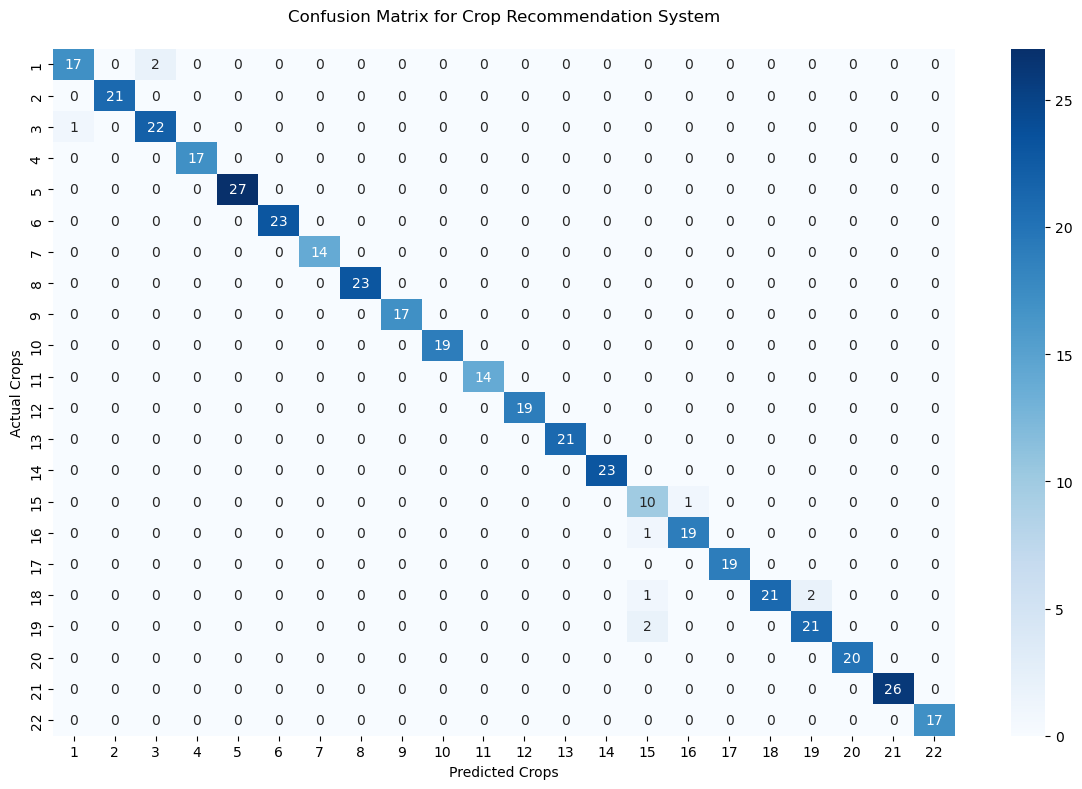

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

crop_labels = np.unique(y_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a detailed visualization
plt.figure(figsize=(12, 8))
sns.heatmap(cm, 
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=crop_labels,
            yticklabels=crop_labels)

plt.title('Confusion Matrix for Crop Recommendation System', pad=20)
plt.xlabel('Predicted Crops')
plt.ylabel('Actual Crops')
plt.tight_layout()
plt.show()

# Calculate metrics from confusion matrix
TP = np.diag(cm)  # True Positives for each class
FP = np.sum(cm, axis=0) - TP  # False Positives
FN = np.sum(cm, axis=1) - TP  # False Negatives
TN = np.sum(cm) - (TP + FP + FN)  # True Negatives


In [75]:
# Print detailed analysis
print("Detailed Analysis per Crop:")
for i, crop in enumerate(crop_labels):
    print(f"\nCrop: {crop}")
    print(f"True Positives: {TP[i]}")
    print(f"False Positives: {FP[i]}")
    print(f"False Negatives: {FN[i]}")
    print(f"True Negatives: {TN[i]}")
    print(f"Accuracy: {(TP[i] + TN[i])/(TP[i] + TN[i] + FP[i] + FN[i]):.4f}")


Detailed Analysis per Crop:

Crop: 1
True Positives: 17
False Positives: 1
False Negatives: 2
True Negatives: 420
Accuracy: 0.9932

Crop: 2
True Positives: 21
False Positives: 0
False Negatives: 0
True Negatives: 419
Accuracy: 1.0000

Crop: 3
True Positives: 22
False Positives: 2
False Negatives: 1
True Negatives: 415
Accuracy: 0.9932

Crop: 4
True Positives: 17
False Positives: 0
False Negatives: 0
True Negatives: 423
Accuracy: 1.0000

Crop: 5
True Positives: 27
False Positives: 0
False Negatives: 0
True Negatives: 413
Accuracy: 1.0000

Crop: 6
True Positives: 23
False Positives: 0
False Negatives: 0
True Negatives: 417
Accuracy: 1.0000

Crop: 7
True Positives: 14
False Positives: 0
False Negatives: 0
True Negatives: 426
Accuracy: 1.0000

Crop: 8
True Positives: 23
False Positives: 0
False Negatives: 0
True Negatives: 417
Accuracy: 1.0000

Crop: 9
True Positives: 17
False Positives: 0
False Negatives: 0
True Negatives: 423
Accuracy: 1.0000

Crop: 10
True Positives: 19
False Positives:

## Recommendation Function

In [33]:
def recommendation(N, P, K, tempreature, humidity, ph):
    features = np.array([[N, P, K, tempreature, humidity, ph]])
    print(f"Raw features: {features}")

    mx_features = mx.transform(features)
    print(f"After MinMaxScaler: {mx_features}")

    sc_features = sc.transform(mx_features)
    print(f"After StandardScaler: {sc_features}")

    # Predict using the trained model
    prediction = randclf.predict(sc_features)
    print(f"Raw prediction: {prediction}")

    return prediction[0]


In [34]:
crop.head()

,N,P,K,temperature,humidity,ph,label
0,90,42,43,20.879744,82.002744,6.502985,1
1,85,58,41,21.770462,80.319644,7.038096,1
2,60,55,44,23.004459,82.320763,7.840207,1
3,74,35,40,26.491096,80.158363,6.980401,1
4,78,42,42,20.130175,81.604873,7.628473,1


In [35]:
N=90
P= 42
K= 43
temperature= 20.879744
humidity=82.002744
ph=6.502985

predict = recommendation(N,P,K,temperature,humidity,ph)

Raw features: [[90.       42.       43.       20.879744 82.002744  6.502985]]
After MinMaxScaler: [[0.64285714 0.26428571 0.19       0.34588614 0.79022954 0.46626359]]
After StandardScaler: [[ 1.05434309 -0.34347068 -0.10058754 -0.92360852  0.47428761  0.0349771 ]]
Raw prediction: [1]


/home/teddy/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [36]:
predict

1

## Save the Model and Scalers into Pickle Files

In [37]:
import pickle
pickle.dump(randclf, open('model.pkl', 'wb'))
pickle.dump(mx, open('minmaxscaler.pkl', 'wb'))
pickle.dump(sc, open('standscaler.pkl', 'wb'))